In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

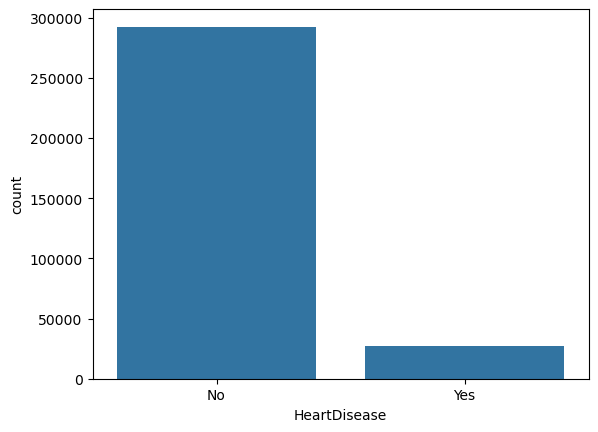

In [3]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [4]:
print("Ratio of count of class 'No' to class 'Yes':", len(df[df['HeartDisease']=='No'])/len(df[df['HeartDisease']=='Yes']))

Ratio of count of class 'No' to class 'Yes': 10.682862674898622


In [5]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 245212,
 'Hispanic': 27446,
 'Black': 22939,
 'Other': 10928,
 'Asian': 8068,
 'American Indian/Alaskan Native': 5202}

<AxesSubplot:xlabel='Race', ylabel='count'>

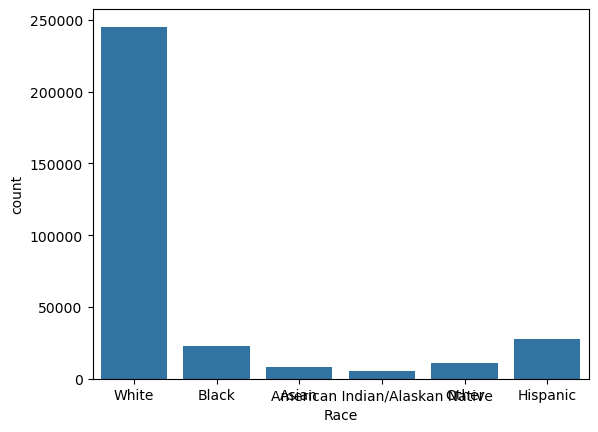

In [6]:
sns.countplot(x = df["Race"])

In [7]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.23322128238402726


In [8]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_1

array([0.76677872, 0.04664426, 0.04664426, 0.04664426, 0.04664426,
       0.04664426])

In [9]:
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

In [10]:
counts.keys()

dict_keys(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'])

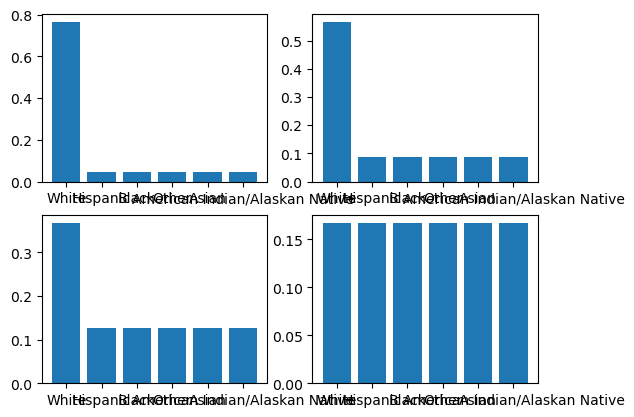

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

# Remove Duplicates

In [12]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (319795, 18)
Duplicates in dataset: 18078


In [13]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (301717, 18)
Duplicates in dataset: 0


In [14]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 227724,
 'Hispanic': 27107,
 'Black': 22810,
 'Other': 10891,
 'Asian': 7993,
 'American Indian/Alaskan Native': 5192}

In [15]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.24523974452881342


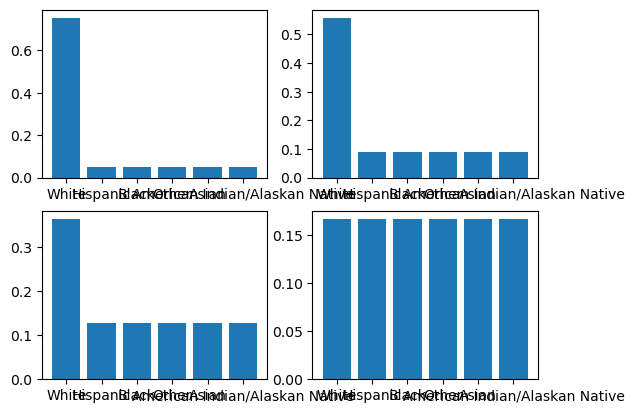

In [16]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

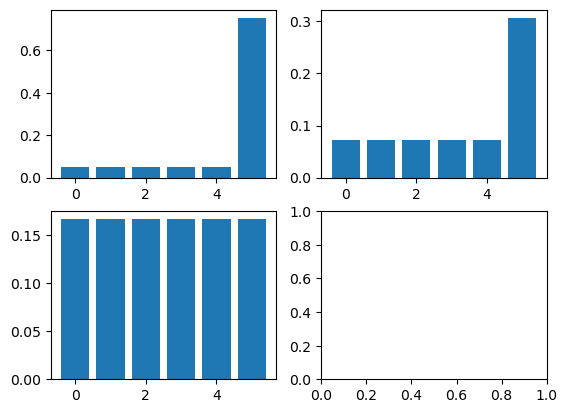

In [38]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_3 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 + target_dist_3) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)

plt.show()

In [17]:
df[df["Race"] == "Asian"]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
69,No,40.00,No,No,No,0.0,0.0,No,Male,60-64,Asian,Yes,No,Good,6.0,No,No,No
160,No,17.71,No,No,No,0.0,10.0,No,Female,65-69,Asian,No,Yes,Good,6.0,No,No,No
405,No,25.80,No,No,No,0.0,0.0,No,Male,50-54,Asian,No,No,Very good,7.0,No,No,No
856,No,25.61,No,No,No,0.0,0.0,No,Female,60-64,Asian,Yes,Yes,Good,7.0,No,No,No
1087,Yes,20.36,No,No,No,10.0,0.0,Yes,Male,70-74,Asian,No,No,Fair,5.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315402,No,25.61,No,No,No,30.0,0.0,No,Female,60-64,Asian,No,Yes,Poor,6.0,No,Yes,No
315404,No,23.83,No,No,No,0.0,0.0,No,Female,70-74,Asian,No,No,Very good,8.0,No,No,No
315707,No,29.39,No,No,No,0.0,0.0,No,Male,65-69,Asian,No,Yes,Fair,7.0,No,No,No
317066,No,24.03,No,Yes,No,0.0,20.0,No,Female,18-24,Asian,No,Yes,Excellent,8.0,Yes,No,No


In [18]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [19]:
['Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
       'Asthma', 'KidneyDisease', 'SkinCancer']

['Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

continuous_vars=df.select_dtypes('float64').columns
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.830820,1,0,0,-0.070301,3.183766,0,0,7,5,2,1,4,-1.420852,1,0,1
1,0,-1.252600,0,0,1,-0.438823,-0.507054,0,0,12,5,0,1,4,-0.057636,0,0,0
2,0,-0.287869,1,0,0,2.017986,3.183766,0,1,9,5,2,1,1,0.623971,1,0,0
3,0,-0.654281,0,0,0,-0.438823,-0.507054,0,0,11,5,0,0,2,-0.739244,0,0,1
4,0,-0.731583,0,0,0,3.000709,-0.507054,1,0,4,5,0,1,4,0.623971,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.159547,1,0,0,0.421060,-0.507054,1,1,8,3,2,0,1,-0.739244,1,0,0
319791,0,0.216141,1,0,0,-0.438823,-0.507054,0,1,3,3,0,1,4,-1.420852,1,0,0
319792,0,-0.649643,0,0,0,-0.438823,-0.507054,0,0,5,3,0,1,2,-0.739244,0,0,0
319793,0,0.675316,0,0,0,-0.438823,-0.507054,0,0,1,3,0,0,2,3.350402,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [23]:
training_data.size, testing_data.size

(4344714, 1086192)

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [25]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.869181,1,1,0,-0.193142,-0.260999,0,1,4,5,0,1,2,0.623971,0,0,0
1,0,0.372292,0,0,0,0.052539,-0.507054,0,1,0,4,0,1,4,-0.739244,1,0,0
2,0,1.262813,1,0,0,-0.315982,-0.260999,0,1,4,3,0,0,2,-0.739244,0,0,0
3,0,0.186767,0,0,0,-0.438823,-0.507054,0,0,9,5,0,0,4,1.305579,0,0,0
4,1,-0.294053,0,0,0,-0.438823,0.354137,0,1,5,5,0,1,4,-0.739244,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241368,0,1.657054,0,0,0,-0.438823,-0.507054,0,0,8,5,2,1,4,0.623971,0,0,1
241369,0,-0.029679,0,0,0,-0.315982,0.108083,0,0,3,5,0,1,0,0.623971,0,0,0
241370,0,1.080380,0,0,1,-0.438823,-0.507054,1,0,11,5,2,0,2,-0.739244,0,0,0
241371,1,-0.182738,1,0,0,-0.438823,-0.507054,0,1,12,5,0,1,0,0.623971,0,1,1


In [26]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.563064,1,0,0,-0.438823,-0.507054,0,0,9,5,0,1,0,-0.739244,0,0,0
1,0,-0.515137,1,0,0,-0.438823,-0.507054,0,1,8,0,0,0,0,1.305579,0,0,0
2,0,-0.779510,0,0,0,-0.438823,-0.507054,0,1,9,5,0,1,2,-1.420852,0,0,0
3,0,0.444956,1,1,0,-0.438823,0.477165,1,0,9,5,0,1,2,1.305579,0,0,1
4,0,0.967519,0,0,1,0.421060,-0.507054,0,1,9,5,0,1,2,-0.057636,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60339,0,0.763441,0,0,0,-0.438823,-0.507054,0,1,1,5,0,1,2,-2.102460,1,0,0
60340,0,0.363016,1,0,0,-0.438823,-0.507054,0,0,7,5,0,1,4,-0.057636,0,0,0
60341,0,-0.110074,0,0,0,-0.438823,-0.507054,0,0,9,5,0,1,4,-0.057636,0,0,0
60342,0,-0.903194,0,0,0,3.246390,-0.507054,1,0,12,5,0,0,2,0.623971,0,0,1


In [43]:
# class count
class_counts = training_data['Race'].value_counts()

# Separate class
classes = [training_data[training_data['Race'] == i] for i in range (6)]
class_5 = training_data[training_data['Race'] == 5]
class_1 = training_data[training_data['Race'] != 5]

print('Class 0 [Race = White]:', class_0.shape)
print('Class 1 [Race != White]:', class_1.shape)

Class 0 [Race = White]: (182109, 18)
Class 1 [Race != White]: (59264, 18)


In [36]:
class_count_0 = class_0.shape[0]
class_count_1 = class_0.shape[0]

In [35]:
race = {5: "White", 3: "Hispanic", 2: "Black", 4: "Other", 1: "Asian", 0: "American Indian/Alaskan Native"}

In [49]:
counts = training_data['Race'].value_counts()
counts = dict(counts)
counts

total = 0
nonwhite = 0

for race, num in counts.items():
    if race != 5:
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.24552870453613287


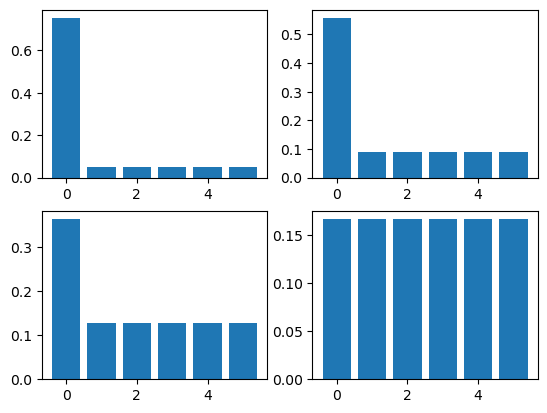

In [51]:
num_races = len(counts.items())

target_dist_1 = np.array([percent_nonwhite / (num_races - 1) for i in range (num_races - 1)] + [1 - (percent_nonwhite)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

### 7.1 Random Under-sampling

In [42]:
counts # 0 is the limiting factor

{5: 182109, 3: 21660, 2: 18249, 4: 8746, 1: 6427, 0: 4182}

In [46]:
min_count_nonwhite = counts[0]
for i in range (5):
    min_count_nonwhite = min(min_count_nonwhite, counts[i])

In [58]:
182109 / 15.0

12140.6

In [54]:
counts[5] * target_dist_1[0] / target_dist_1[5]

11852.8

In [59]:
min_count_nonwhite = min(min_count_nonwhite, float(counts[5] * target_dist_1[0]) / target_dist_1[5])
min_count_nonwhite = int(min_count_nonwhite)

min_count_nonwhite

4182

In [47]:
target_dist_1

array([0.7544713 , 0.04910574, 0.04910574, 0.04910574, 0.04910574,
       0.04910574])

In [70]:
counts_dist_1 = [int(float(min_count_nonwhite * target_dist_1[i]) / target_dist_1[0]) for i in range (6)]

In [72]:
counts_dist_1

[4182, 4182, 4182, 4182, 4182, 64253]

Total counts:
Race
5    64253
0     4182
1     4182
2     4182
3     4182
4     4182
Name: count, dtype: int64


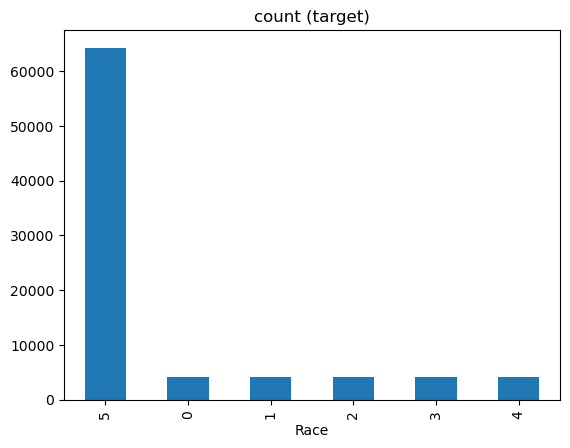

In [75]:
under_classes = [classes[i].sample(counts_dist_1[i]) for i in range (6)]

training_data_1 = pd.concat(under_classes, axis=0)

# plot the count after under-sampling
print("Total counts:")
print(training_data_1['Race'].value_counts())
training_data_1['Race'].value_counts().plot(kind='bar', title='count (target)')
plt.show()